In [ ]:
%pip install polars
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pl.read_csv('/Users/abhishekshah/Desktop/customer_analysis/twcs/twcs.csv')
except FileNotFoundError:
    print("Error: twcs.csv not found. Please make sure the file is in the correct directory.")
    exit()

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Display the first few rows of the dataframe
print("First 5 rows of the dataframe:")
df.head()

First 5 rows of the dataframe:


tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
i64,str,bool,str,str,str,i64
1,"""sprintcare""",false,"""Tue Oct 31 22:10:47 +0000 2017""","""@115712 I understand. I would …","""2""",3
2,"""115712""",true,"""Tue Oct 31 22:11:45 +0000 2017""","""@sprintcare and how do you pro…",null,1
3,"""115712""",true,"""Tue Oct 31 22:08:27 +0000 2017""","""@sprintcare I have sent severa…","""1""",4
4,"""sprintcare""",false,"""Tue Oct 31 21:54:49 +0000 2017""","""@115712 Please send us a Priva…","""3""",5
5,"""115712""",true,"""Tue Oct 31 21:49:35 +0000 2017""","""@sprintcare I did.""","""4""",6


In [ ]:
# Get the shape of the dataframe
print("\nShape of the dataframe:", df.shape)


Shape of the dataframe: (2811774, 7)


In [ ]:
# Descriptive statistics
print("\nDescriptive statistics:")
df.describe()


Descriptive statistics:


statistic,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
str,f64,str,f64,str,str,str,f64
"""count""",2.811774e6,"""2811774""",2.811774e6,"""2811774""","""2811774""","""1771145""",2.017439e6
"""null_count""",0.0,"""0""",0.0,"""0""","""0""","""1040629""",794335.0
"""mean""",1.5046e6,null,0.54693,null,null,null,1.4631e6
"""std""",861645.046106,null,null,null,null,null,866573.029042
"""min""",1.0,"""10026""",0.0,"""Fri Apr 01 17:37:48 +0000 2016""","""! @AmericanAir doesn't have be…","""1""",1.0
"""25%""",760165.0,null,null,null,null,null,715511.0
"""50%""",1.507772e6,null,null,null,null,null,1.439805e6
"""75%""",2.253296e6,null,null,null,null,null,2.220647e6
"""max""",2.98795e6,"""sprintcare""",1.0,"""Wed Sep 28 18:06:15 +0000 2016""","""🧕🏽 @delta""","""99998,99999""",2.98795e6


In [ ]:
#get the unique author_ids
unique_author_ids = df['author_id'].unique()
print("\nUnique author_ids:")
print(unique_author_ids)


Unique author_ids:
shape: (702_777,)
Series: 'author_id' [str]
[
	"518027"
	"529890"
	"547434"
	"696435"
	"773899"
	…
	"721398"
	"455341"
	"723354"
	"666091"
	"233367"
]


In [ ]:
#get the unique author_ids
unique_author_ids = df['author_id'].unique()
print("\nUnique author_ids:")
print(unique_author_ids)



Unique author_ids:
shape: (702_777,)
Series: 'author_id' [str]
[
	"763570"
	"441940"
	"781159"
	"391575"
	"492005"
	…
	"580156"
	"188498"
	"730746"
	"179884"
	"315339"
]


In [ ]:
# Explore the 'in_response_to_tweet_id' distribution
print("\n'in_response_to_tweet_id' value counts:")
print(df['in_response_to_tweet_id'].value_counts().head(10))

# Explore the 'created_at' distribution
print("\n'created_at' value counts:")
print(df['created_at'].value_counts().head(10))


'in_response_to_tweet_id' value counts:
shape: (10, 2)
┌─────────────────────────┬───────┐
│ in_response_to_tweet_id ┆ count │
│ ---                     ┆ ---   │
│ i64                     ┆ u32   │
╞═════════════════════════╪═══════╡
│ 2740610                 ┆ 1     │
│ 940598                  ┆ 1     │
│ 2070389                 ┆ 1     │
│ 1205498                 ┆ 1     │
│ 1155050                 ┆ 1     │
│ 1516454                 ┆ 1     │
│ 2362186                 ┆ 1     │
│ 1324227                 ┆ 1     │
│ 2840952                 ┆ 1     │
│ 1180521                 ┆ 1     │
└─────────────────────────┴───────┘

'created_at' value counts:
shape: (10, 2)
┌────────────────────────────────┬───────┐
│ created_at                     ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ u32   │
╞════════════════════════════════╪═══════╡
│ Tue Nov 14 13:47:49 +0000 2017 ┆ 1     │
│ Sat Nov 25 15:31:45 +0000 2017 ┆ 2     │
│ Mon Oct 23 08:52:23 +0

In [ ]:
# Calculate company user IDs based on the 'inbound' field
company_user_ids = df.filter(pl.col('inbound') == False)['author_id'].unique()
print("\nCompany user IDs:")
print(company_user_ids)


Company user IDs:
shape: (108,)
Series: 'author_id' [str]
[
	"idea_cares"
	"AskVirginMoney"
	"airtel_care"
	"AzureSupport"
	"BoostCare"
	…
	"AmericanAir"
	"Uber_Support"
	"mediatemplehelp"
	"MTNC_Care"
	"sainsburys"
]


In [ ]:
#get first 10 tweets 
print("\nFirst 10 tweets:")
for i in range(10):
    print(f"Tweet {i+1}:")
    print(f"Author ID: {df['author_id'][i]}")
    print(f"Created At: {df['created_at'][i]}")
    print(f"Text: {df['text'][i]}")
    print("-" * 50)


First 10 tweets:
Tweet 1:
Author ID: sprintcare
Created At: Tue Oct 31 22:10:47 +0000 2017
Text: @115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.
--------------------------------------------------
Tweet 2:
Author ID: 115712
Created At: Tue Oct 31 22:11:45 +0000 2017
Text: @sprintcare and how do you propose we do that
--------------------------------------------------
Tweet 3:
Author ID: 115712
Created At: Tue Oct 31 22:08:27 +0000 2017
Text: @sprintcare I have sent several private messages and no one is responding as usual
--------------------------------------------------
Tweet 4:
Author ID: sprintcare
Created At: Tue Oct 31 21:54:49 +0000 2017
Text: @115712 Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.
--------------------------------------------------
Tweet 5:
Author ID: 115712
Created At: Tue Oct 31 21:49:35 +0000 2017
Text: @sprintcare I 

#### Identify Company and Consumer Users
- Company users: inbound == False
- Consumer users: inbound == True

In [ ]:
company_ids = df.filter(pl.col("inbound") == False)["author_id"].unique()
consumer_ids = df.filter(pl.col("inbound") == True)["author_id"].unique()

print(f"Number of company users: {company_ids.len()}")
print(f"Number of consumer users: {consumer_ids.len()}")


Number of company users: 108
Number of consumer users: 702669


In [ ]:
# Basic Dataset Overview
# a. Total tweet count & unique users
tweet_count = df.height
unique_users = df.get_column('author_id').n_unique()

print(f"Total Tweets: {tweet_count}")
print(f"Unique Users: {unique_users}")

Total Tweets: 2811774
Unique Users: 702777


In [ ]:
#Distribution of inbound vs outbound tweets
inbound_counts = df.group_by('inbound').len()
print(inbound_counts)

shape: (2, 2)
┌─────────┬─────────┐
│ inbound ┆ len     │
│ ---     ┆ ---     │
│ bool    ┆ u32     │
╞═════════╪═════════╡
│ true    ┆ 1537843 │
│ false   ┆ 1273931 │
└─────────┴─────────┘


In [ ]:
# Text Analysis
# a. Add Tweet Length Column
# Add Tweet Length Column
df = df.with_columns(
    pl.col("text").str.len_chars().alias("tweet_length")  # Use len_chars() for accurate length
)

# Compute descriptive statistics
tweet_length_stats = df.select(pl.col("tweet_length")).describe()
print("\nTweet Length Statistics:")
print(tweet_length_stats)



Tweet Length Statistics:
shape: (9, 2)
┌────────────┬──────────────┐
│ statistic  ┆ tweet_length │
│ ---        ┆ ---          │
│ str        ┆ f64          │
╞════════════╪══════════════╡
│ count      ┆ 2.811774e6   │
│ null_count ┆ 0.0          │
│ mean       ┆ 113.889707   │
│ std        ┆ 52.345616    │
│ min        ┆ 1.0          │
│ 25%        ┆ 78.0         │
│ 50%        ┆ 115.0        │
│ 75%        ┆ 139.0        │
│ max        ┆ 513.0        │
└────────────┴──────────────┘


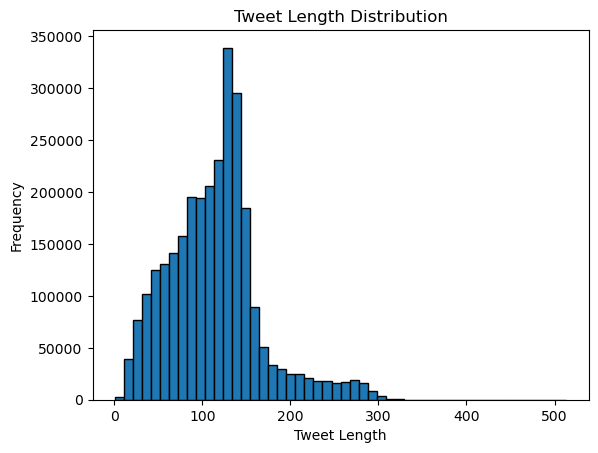

In [ ]:
import matplotlib.pyplot as plt

tweet_lengths = df.get_column("tweet_length").to_numpy()
plt.hist(tweet_lengths, bins=50, edgecolor='black')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Tweet Length Distribution')
plt.show()

In [ ]:
# Convert the datetime column to the correct format and then perform groupby
daily_counts = (df.with_columns(
    pl.col('created_at').dt.strftime('%Y-%m-%d').alias('date')
)
.group_by('date')
.agg(pl.count().alias('count'))
.sort('date'))

daily_counts.head(10)


/var/folders/r6/b87zwk157sz4fy3q2qlsmrp00000gn/T/ipykernel_74818/3281104689.py:6: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias('count'))


date,count
str,u32
"""2008-05-08""",2
"""2010-02-16""",1
"""2010-03-31""",2
"""2010-07-05""",2
"""2010-08-30""",1
"""2010-09-07""",1
"""2011-03-13""",1
"""2011-06-07""",1
"""2011-06-16""",2


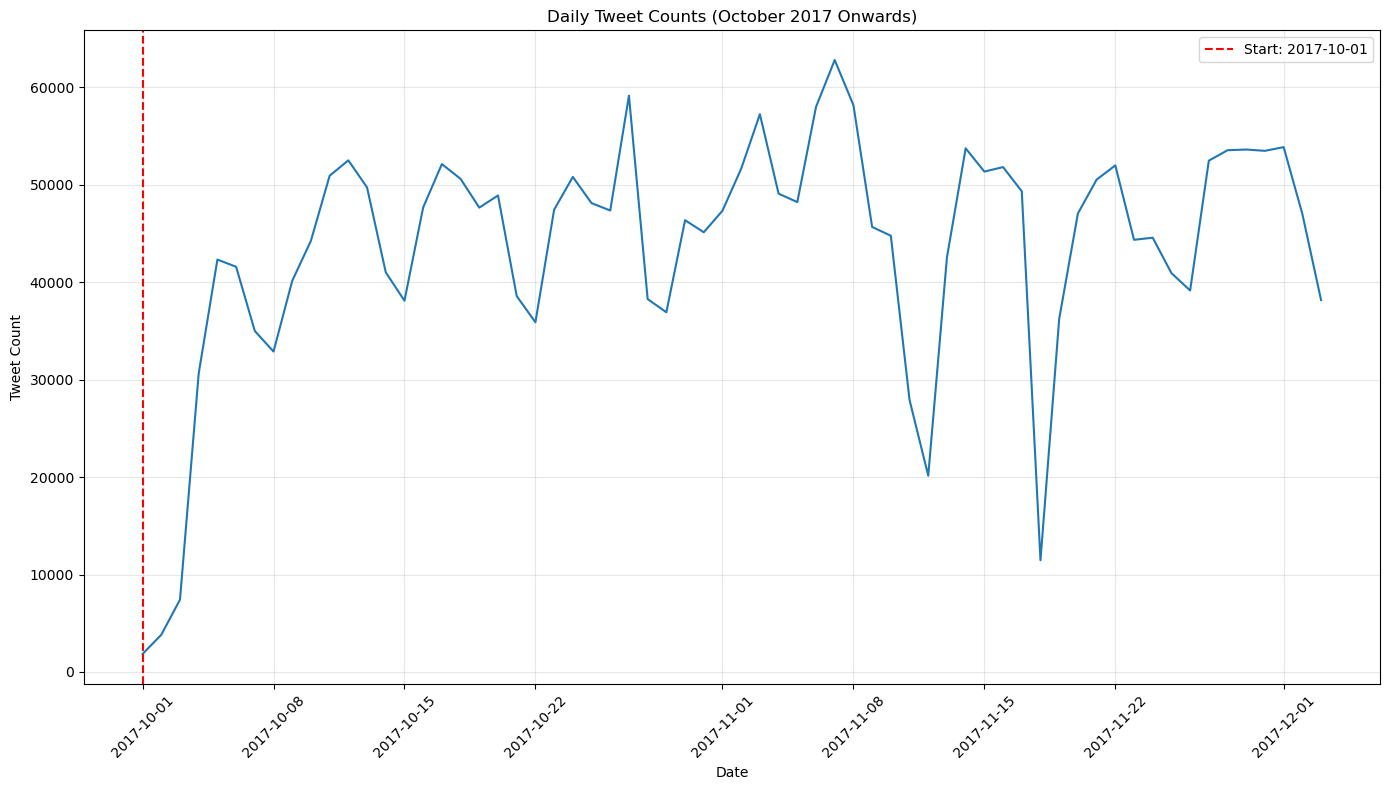

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl

# Convert Polars DataFrame to Pandas for easier plotting with matplotlib
daily_counts_pd = daily_counts.to_pandas()
daily_counts_pd['date'] = pd.to_datetime(daily_counts_pd['date'])

# Filter the data to only show from October 2017 onwards
start_date = pd.to_datetime('2017-10-01')  # October 2017
filtered_data = daily_counts_pd[daily_counts_pd['date'] >= start_date]

plt.figure(figsize=(14, 8))
plt.plot(filtered_data['date'], filtered_data['count'])
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.title("Daily Tweet Counts (October 2017 Onwards)")

# Add a reference line for the start date
plt.axvline(x=start_date, color='red', linestyle='--', 
            label=f'Start: {start_date.date()}')
plt.legend()

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Response time statistics (minutes):
shape: (9, 2)
┌────────────┬───────────────────────┐
│ statistic  ┆ response_time_minutes │
│ ---        ┆ ---                   │
│ str        ┆ f64                   │
╞════════════╪═══════════════════════╡
│ count      ┆ 2.013577e6            │
│ null_count ┆ 0.0                   │
│ mean       ┆ 1292.758429           │
│ std        ┆ 31100.015518          │
│ min        ┆ 0.0                   │
│ 25%        ┆ 4.616667              │
│ 50%        ┆ 17.9                  │
│ 75%        ┆ 111.583333            │
│ max        ┆ 4.9591e6              │
└────────────┴───────────────────────┘


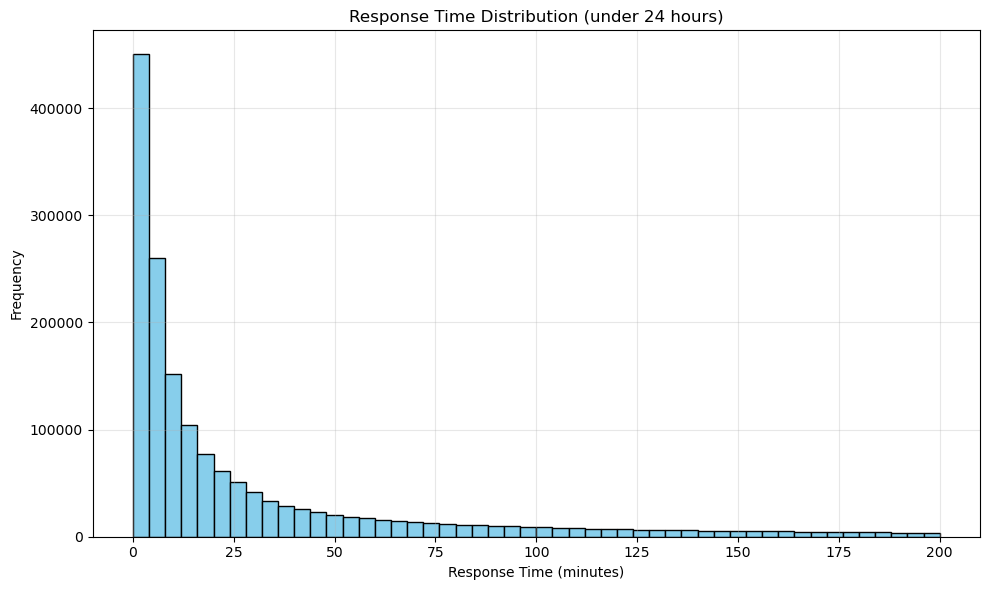


Company response time statistics:
shape: (9, 2)
┌────────────┬───────────────────────┐
│ statistic  ┆ response_time_minutes │
│ ---        ┆ ---                   │
│ str        ┆ f64                   │
╞════════════╪═══════════════════════╡
│ count      ┆ 1.265281e6            │
│ null_count ┆ 0.0                   │
│ mean       ┆ 300.845657            │
│ std        ┆ 5632.305794           │
│ min        ┆ 0.0                   │
│ 25%        ┆ 6.183333              │
│ 50%        ┆ 21.15                 │
│ 75%        ┆ 107.183333            │
│ max        ┆ 2.6097e6              │
└────────────┴───────────────────────┘

Top 10 companies by response volume:
shape: (10, 3)
┌─────────────────┬────────────────┬───────────────────┐
│ author_id       ┆ response_count ┆ avg_response_time │
│ ---             ┆ ---            ┆ ---               │
│ str             ┆ u32            ┆ f64               │
╞═════════════════╪════════════════╪═══════════════════╡
│ AmazonHelp      ┆ 168823  

/var/folders/r6/b87zwk157sz4fy3q2qlsmrp00000gn/T/ipykernel_74818/4001017764.py:46: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias('response_count'),


In [ ]:
import polars as pl
import matplotlib.pyplot as plt

# Get tweets that are responses to other tweets
responses = df.filter(pl.col('in_response_to_tweet_id').is_not_null())

# Join with original tweets to get both timestamps
response_times = responses.join(
    df.select('tweet_id', pl.col('created_at').alias('original_created_at')),
    left_on='in_response_to_tweet_id',
    right_on='tweet_id',
    how='inner'
)

# Calculate response time in minutes directly from datetime columns
response_times = response_times.with_columns(
    ((pl.col('created_at') - pl.col('original_created_at')).dt.total_seconds() / 60).alias('response_time_minutes')
)

# Print summary statistics
print("Response time statistics (minutes):")
print(response_times.select('response_time_minutes').describe())

# Prepare for visualization - filter out extreme values for better visualization
under_24h = response_times.filter(pl.col('response_time_minutes') < 200) #change this to 1440 for 24 hours
response_times_pd = under_24h.select('response_time_minutes').to_pandas()

plt.figure(figsize=(10, 6))
plt.hist(response_times_pd['response_time_minutes'], bins=50, color='skyblue', edgecolor='black')
plt.title('Response Time Distribution (under 24 hours)')
plt.xlabel('Response Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Additional analysis: Show average response time by company
if 'inbound' in df.columns:
    company_responses = response_times.filter(~pl.col('inbound'))
    print("\nCompany response time statistics:")
    print(company_responses.select('response_time_minutes').describe())
    
    # Top 10 companies by response volume
    print("\nTop 10 companies by response volume:")
    print(company_responses.group_by('author_id').agg(
        pl.count().alias('response_count'),
        pl.col('response_time_minutes').mean().alias('avg_response_time')
    ).sort('response_count', descending=True).head(10))

/var/folders/r6/b87zwk157sz4fy3q2qlsmrp00000gn/T/ipykernel_74818/1090938114.py:11: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias('response_count'),
/var/folders/r6/b87zwk157sz4fy3q2qlsmrp00000gn/T/ipykernel_74818/1090938114.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_stats_pd.head(15), x='author_id', y='avg_response_time', palette='viridis')


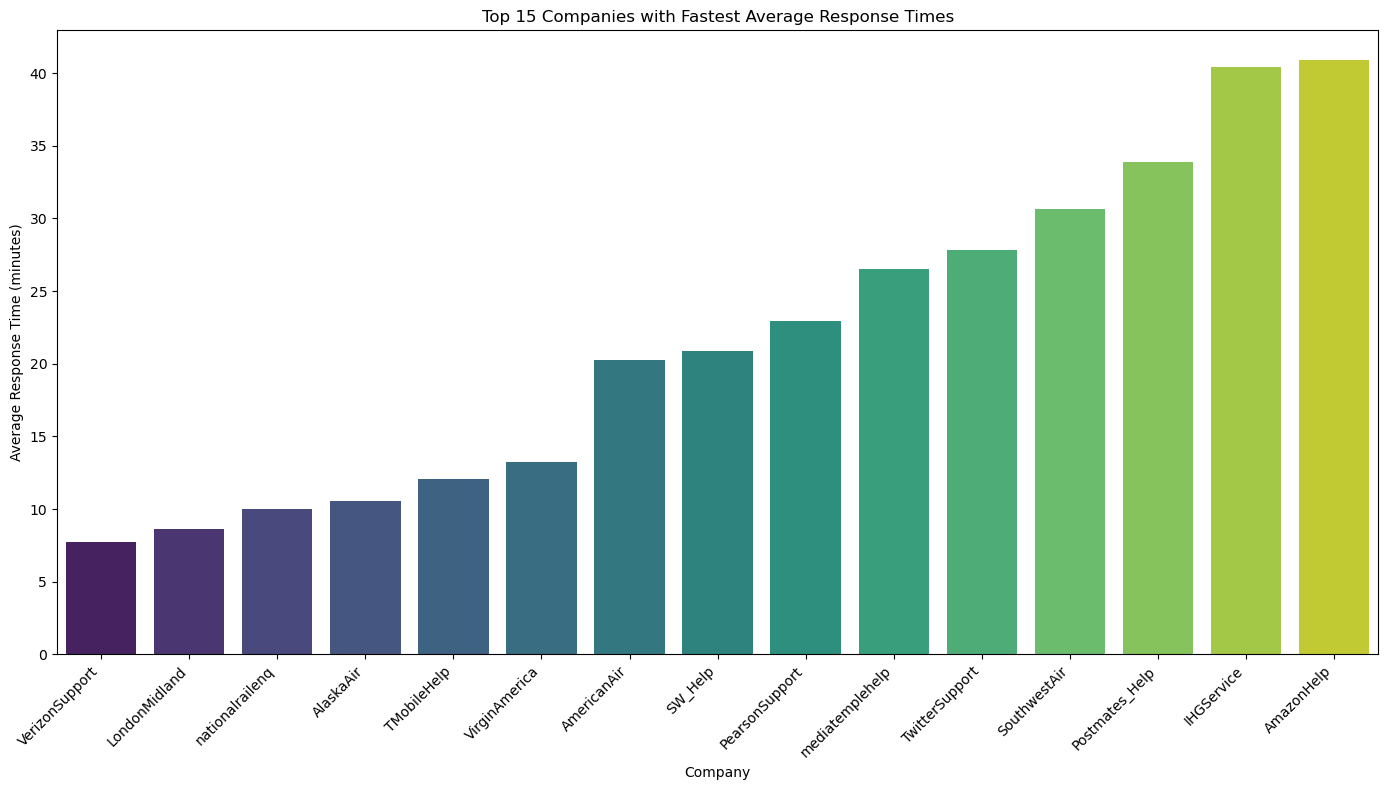

/var/folders/r6/b87zwk157sz4fy3q2qlsmrp00000gn/T/ipykernel_74818/1090938114.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_stats_pd.tail(15), x='author_id', y='avg_response_time', palette='viridis')


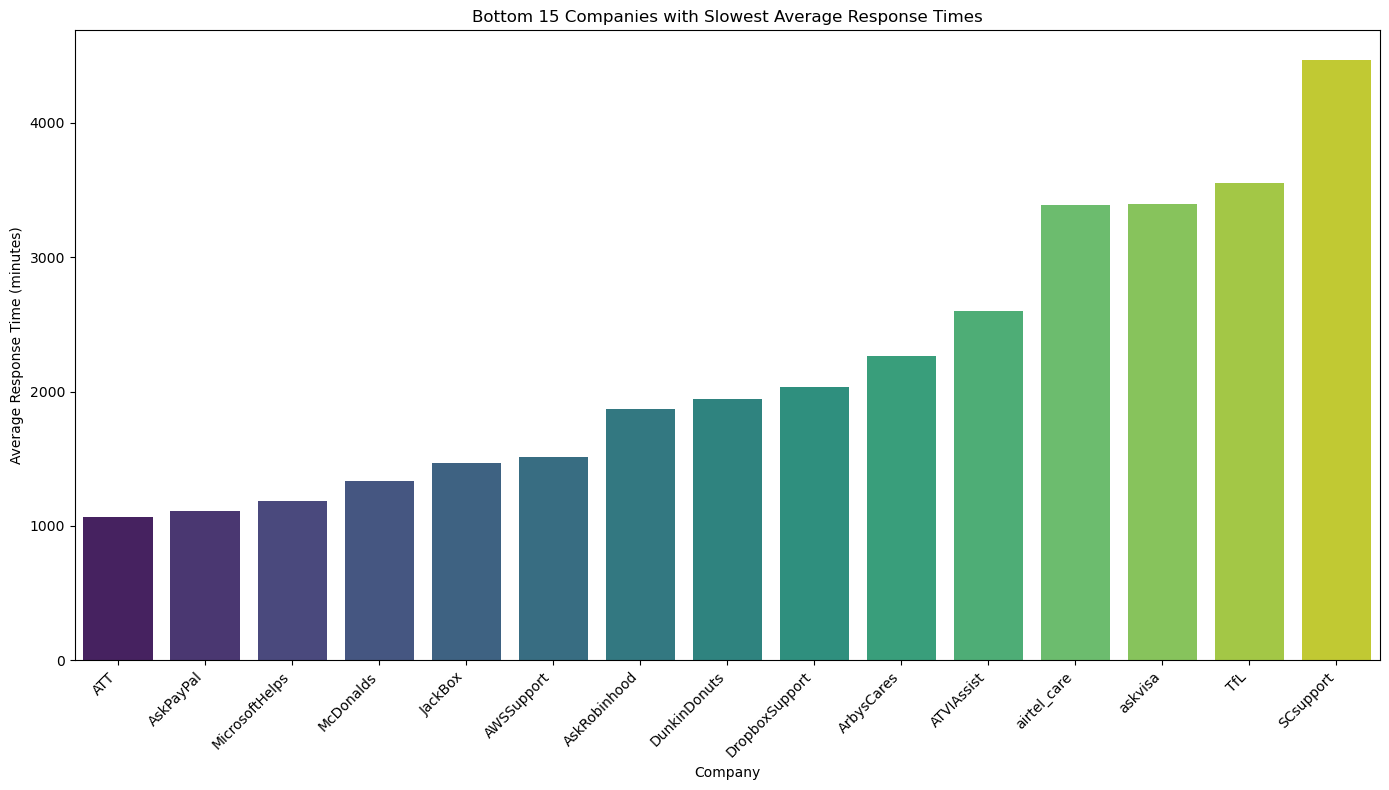

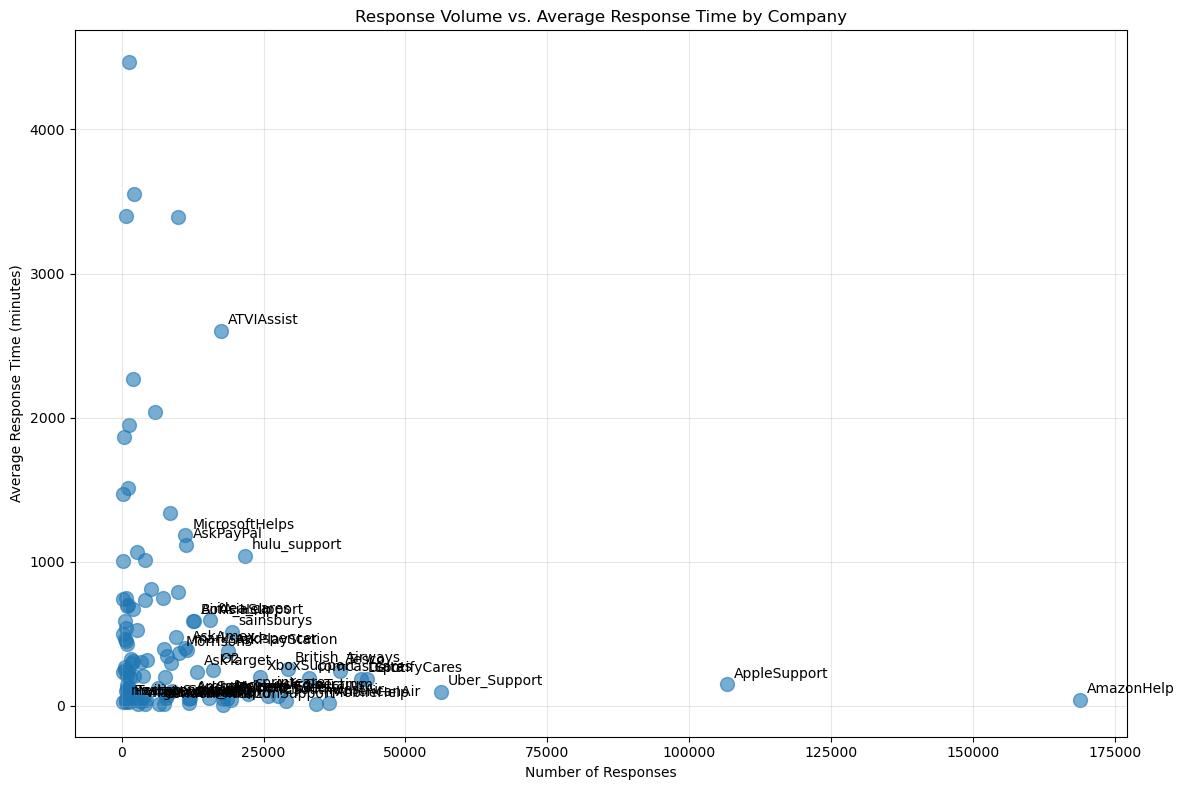

Companies with fastest response times:
shape: (10, 4)
┌─────────────────┬────────────────┬───────────────────┬──────────────────────┐
│ author_id       ┆ response_count ┆ avg_response_time ┆ median_response_time │
│ ---             ┆ ---            ┆ ---               ┆ ---                  │
│ str             ┆ u32            ┆ f64               ┆ f64                  │
╞═════════════════╪════════════════╪═══════════════════╪══════════════════════╡
│ VerizonSupport  ┆ 17805          ┆ 7.742148          ┆ 3.3                  │
│ LondonMidland   ┆ 6515           ┆ 8.666135          ┆ 4.616667             │
│ nationalrailenq ┆ 4135           ┆ 9.983567          ┆ 5.433333             │
│ AlaskaAir       ┆ 7414           ┆ 10.567955         ┆ 3.5                  │
│ TMobileHelp     ┆ 34229          ┆ 12.058391         ┆ 2.75                 │
│ VirginAmerica   ┆ 2802           ┆ 13.266661         ┆ 3.616667             │
│ AmericanAir     ┆ 36531          ┆ 20.273799         ┆ 10.733333

In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get all company responses
company_responses = response_times.filter(~pl.col('inbound'))

# Calculate average response time by company
company_stats = company_responses.group_by('author_id').agg([
    pl.count().alias('response_count'),
    pl.col('response_time_minutes').mean().alias('avg_response_time'),
    pl.col('response_time_minutes').median().alias('median_response_time')
]).filter(
    pl.col('response_count') > 100  # Filter to companies with significant number of responses
).sort('avg_response_time')

# Convert to pandas for easier visualization
company_stats_pd = company_stats.to_pandas()

# Plot top 15 companies by response time (fastest)
plt.figure(figsize=(14, 8))
sns.barplot(data=company_stats_pd.head(15), x='author_id', y='avg_response_time', palette='viridis')
plt.title('Top 15 Companies with Fastest Average Response Times')
plt.xlabel('Company')
plt.ylabel('Average Response Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot bottom 15 companies (slowest responders)
plt.figure(figsize=(14, 8))
sns.barplot(data=company_stats_pd.tail(15), x='author_id', y='avg_response_time', palette='viridis')
plt.title('Bottom 15 Companies with Slowest Average Response Times')
plt.xlabel('Company')
plt.ylabel('Average Response Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a scatter plot of response count vs. response time
plt.figure(figsize=(12, 8))
plt.scatter(company_stats_pd['response_count'], 
            company_stats_pd['avg_response_time'], 
            alpha=0.6, s=100)

# Add labels for notable companies
for i, row in company_stats_pd.iterrows():
    if row['response_count'] > 10000 or row['avg_response_time'] < 30:
        plt.annotate(row['author_id'], 
                    xy=(row['response_count'], row['avg_response_time']),
                    xytext=(5, 5), textcoords='offset points')

plt.title('Response Volume vs. Average Response Time by Company')
plt.xlabel('Number of Responses')
plt.ylabel('Average Response Time (minutes)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display statistics for top responders
print("Companies with fastest response times:")
print(company_stats.head(10))

print("\nCompanies with slowest response times:")
print(company_stats.tail(10))

print("\nCompanies with highest response volumes:")
print(company_stats.sort('response_count', descending=True).head(10))

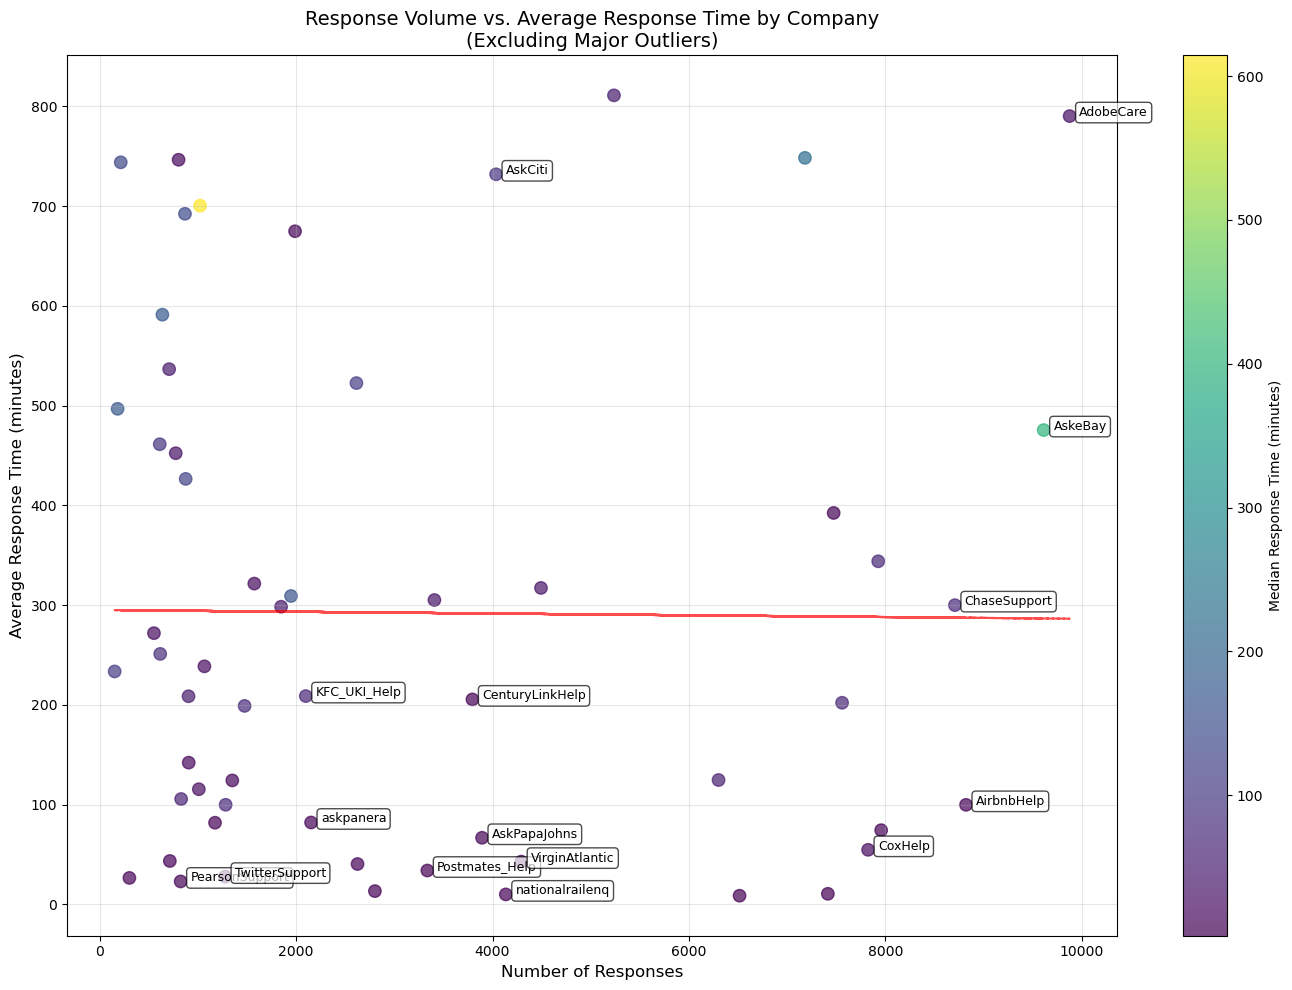

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a filtered dataset excluding the major outliers
filtered_companies = company_stats_pd[
    ~company_stats_pd['author_id'].isin(['AppleSupport', 'AmazonHelp', 'user_support'])
]

# Further filter to remove extreme values
filtered_companies = filtered_companies[
    (filtered_companies['response_count'] < 10000) &  # Remove companies with extremely high volumes
    (filtered_companies['avg_response_time'] < 1000)   # Remove extremely slow responders
]

# Create improved scatter plot with the filtered data
plt.figure(figsize=(14, 10))
plt.scatter(filtered_companies['response_count'], 
            filtered_companies['avg_response_time'], 
            alpha=0.7, 
            s=80,
            c=filtered_companies['median_response_time'],  # Color by median response time
            cmap='viridis')

# Add labels for notable companies (more selective labeling)
for i, row in filtered_companies.iterrows():
    if (row['response_count'] > 2000 or row['avg_response_time'] < 50) and i % 2 == 0:  # Label every other notable company
        plt.annotate(row['author_id'], 
                    xy=(row['response_count'], row['avg_response_time']),
                    xytext=(7, 0), 
                    textcoords='offset points',
                    fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

# Add colorbar to show median response time
cbar = plt.colorbar()
cbar.set_label('Median Response Time (minutes)')

# Add a trend line
z = np.polyfit(filtered_companies['response_count'], filtered_companies['avg_response_time'], 1)
p = np.poly1d(z)
plt.plot(filtered_companies['response_count'], 
         p(filtered_companies['response_count']), 
         "r--", alpha=0.7)

plt.title('Response Volume vs. Average Response Time by Company\n(Excluding Major Outliers)', fontsize=14)
plt.xlabel('Number of Responses', fontsize=12)
plt.ylabel('Average Response Time (minutes)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

These scatter plots visualize the relationship between **the number of responses** and the **average response time** of different companies on social media or customer support platforms. Here's what you can interpret from the charts:

### **Chart 1: Overall Data**
- Most companies have a relatively low average response time (under ~500 minutes), clustered closely along the lower horizontal axis.
- **AmazonHelp** significantly outpaces other companies in terms of the sheer volume of responses (~175,000) and maintains a relatively low average response time. This indicates **high operational efficiency** at scale.
- **AppleSupport** and **Uber_Support** also handle large volumes (over 25,000 responses), yet their average response times are comparatively low, indicating efficient customer support operations.
- Companies like **ATVIAssist** and **MicrosoftHelps** have fewer responses but higher average response times, possibly indicating slower support processes or more complex issues being handled.

### **Chart 2: Data Excluding Major Outliers (Zoomed In)**
- Excluding outliers, there's a clearer visualization of the relationship between response volume and response times for most companies.
- A generally **flat trend (red line)** indicates little correlation between the number of responses and the response time within this subset—meaning that response time is not strongly dependent on response volume.
- **AskeBay** has a relatively high average response time despite moderate volume, indicating potential inefficiencies or complex customer interactions.
- **AdobeCare** and **AskCiti** stand out with higher response times, suggesting possible challenges or lower responsiveness.
- Companies like **TwitterSupport**, **KFC_UKI_Help**, and **CenturyLinkHelp** manage to maintain lower response times with moderate volumes, suggesting efficient customer interaction processes.

### **General Insights:**
- **High Volume & Low Response Time (e.g., AmazonHelp, AppleSupport)**: Efficient, scaled-up support systems.
- **High response times with lower response volume** might indicate potential bottlenecks, resource constraints, or complexity of issues.
- Lower response volume typically doesn't correlate directly with faster response times. Some smaller-scale operations still struggle with high response times.

Overall, this analysis suggests that:
- **AmazonHelp and AppleSupport** handle high volumes efficiently.
- Companies like **ATVIAssist** and **AskCiti** face challenges in responding swiftly, despite lower interaction volumes.
- Effective scaling of customer support is clearly achievable but depends significantly on operational efficiency rather than size alone.

Top Companies by Tweet Count:
shape: (10, 2)
┌─────────────────┬─────────────┐
│ author_id       ┆ tweet_count │
│ ---             ┆ ---         │
│ str             ┆ u32         │
╞═════════════════╪═════════════╡
│ AmazonHelp      ┆ 169840      │
│ AppleSupport    ┆ 106860      │
│ Uber_Support    ┆ 56270       │
│ SpotifyCares    ┆ 43265       │
│ Delta           ┆ 42253       │
│ Tesco           ┆ 38573       │
│ AmericanAir     ┆ 36764       │
│ TMobileHelp     ┆ 34317       │
│ comcastcares    ┆ 33031       │
│ British_Airways ┆ 29361       │
└─────────────────┴─────────────┘

Top Consumers by Tweet Count:
shape: (10, 2)
┌───────────┬─────────────┐
│ author_id ┆ tweet_count │
│ ---       ┆ ---         │
│ str       ┆ u32         │
╞═══════════╪═════════════╡
│ 115911    ┆ 1286        │
│ 120576    ┆ 1010        │
│ 115913    ┆ 563         │
│ 116230    ┆ 454         │
│ 169172    ┆ 448         │
│ 117627    ┆ 406         │
│ 115888    ┆ 332         │
│ 116136    ┆ 295         │
│

/var/folders/r6/b87zwk157sz4fy3q2qlsmrp00000gn/T/ipykernel_74818/1971886633.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tweet_count', y='author_id', data=top_companies_pd, palette='viridis')


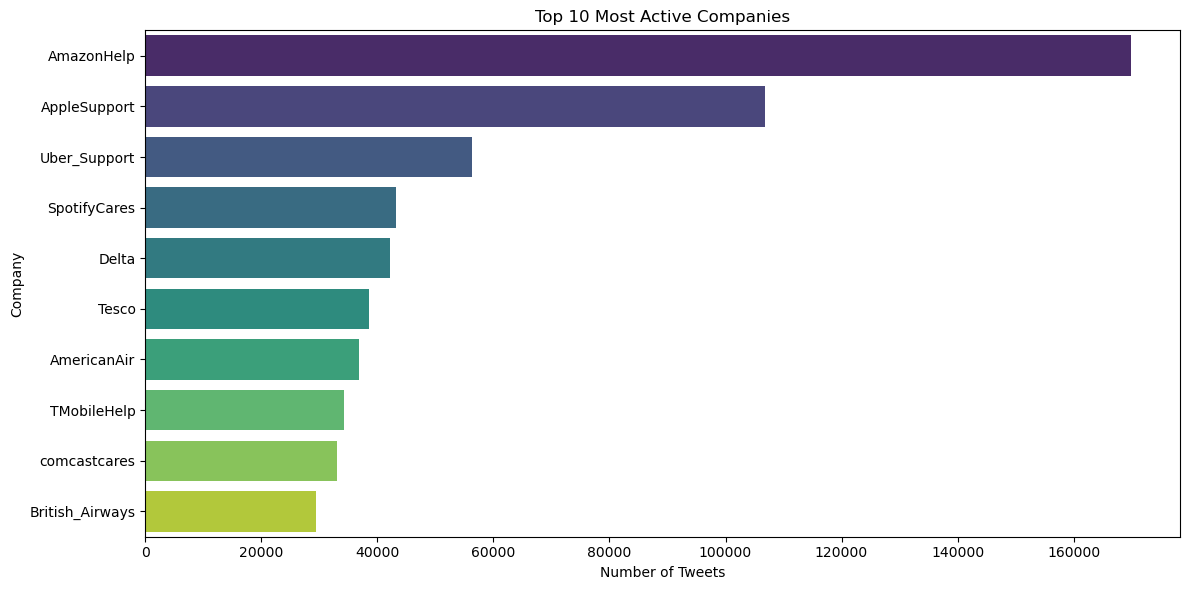

/var/folders/r6/b87zwk157sz4fy3q2qlsmrp00000gn/T/ipykernel_74818/1971886633.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tweet_count', y='author_id', data=top_consumers_pd, palette='mako')


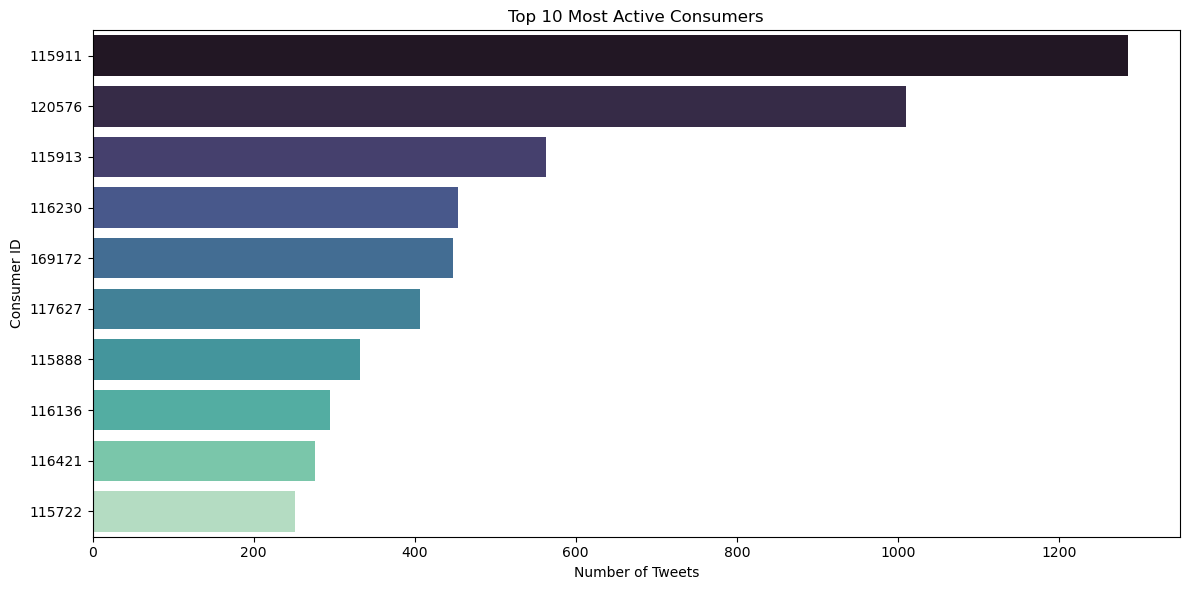

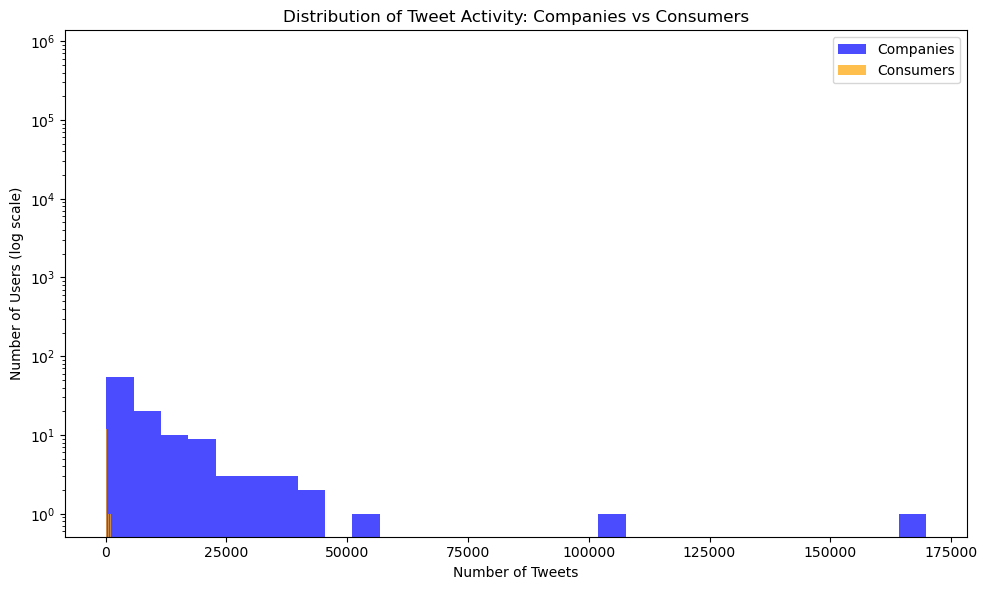

In [ ]:
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

# User Engagement & Activity
# Top active authors (company vs consumer):
top_companies = df.filter(pl.col('inbound') == False)\
                  .group_by('author_id')\
                  .agg(pl.len().alias('tweet_count'))\
                  .sort('tweet_count', descending=True)\
                  .head(10)

top_consumers = df.filter(pl.col('inbound') == True)\
                  .group_by('author_id')\
                  .agg(pl.len().alias('tweet_count'))\
                  .sort('tweet_count', descending=True)\
                  .head(10)

print("Top Companies by Tweet Count:")
print(top_companies)
print("\nTop Consumers by Tweet Count:")
print(top_consumers)

# Convert to pandas for visualization
top_companies_pd = top_companies.to_pandas()
top_consumers_pd = top_consumers.to_pandas()

# Visualize top companies
plt.figure(figsize=(12, 6))
sns.barplot(x='tweet_count', y='author_id', data=top_companies_pd, palette='viridis')
plt.title('Top 10 Most Active Companies')
plt.xlabel('Number of Tweets')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

# Visualize top consumers
plt.figure(figsize=(12, 6))
sns.barplot(x='tweet_count', y='author_id', data=top_consumers_pd, palette='mako')
plt.title('Top 10 Most Active Consumers')
plt.xlabel('Number of Tweets')
plt.ylabel('Consumer ID')
plt.tight_layout()
plt.show()

# Compare company vs consumer activity distribution
plt.figure(figsize=(10, 6))

# Get tweet counts for all companies and consumers
company_counts = df.filter(pl.col('inbound') == False)\
                   .group_by('author_id')\
                   .agg(pl.len().alias('tweet_count'))\
                   .sort('tweet_count', descending=True)

consumer_counts = df.filter(pl.col('inbound') == True)\
                    .group_by('author_id')\
                    .agg(pl.len().alias('tweet_count'))\
                    .sort('tweet_count', descending=True)

# Plot distribution of tweet counts
plt.hist(company_counts['tweet_count'].to_pandas(), bins=30, alpha=0.7, label='Companies', color='blue')
plt.hist(consumer_counts['tweet_count'].to_pandas(), bins=30, alpha=0.7, label='Consumers', color='orange')
plt.yscale('log')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Users (log scale)')
plt.title('Distribution of Tweet Activity: Companies vs Consumers')
plt.legend()
plt.tight_layout()
plt.show()

Inference

### 1. **Response Volume vs. Response Time:**
- **AmazonHelp and AppleSupport** significantly outperform other companies in handling high response volumes efficiently. Despite dealing with extremely high volumes, both maintain relatively low average response times.
- Smaller companies or those with lower tweet volumes (e.g., ATVIAssist, MicrosoftHelps, AdobeCare, AskCiti) tend to have longer average response times, suggesting inefficiencies or complexities in their customer support process.

### Key Insight:
- **Scalability and efficiency:** High-volume responders like Amazon and Apple indicate a scalable and efficient customer support infrastructure.

### 2. **Most Active Companies & Consumers:**
- **AmazonHelp, AppleSupport, and Uber_Support** dominate in customer engagement, demonstrating proactive and extensive customer support efforts via social media.
- A few individual consumers (IDs: 115911, 120576, 115913) show extremely high activity. These might represent highly vocal customers, frequent complainers, or perhaps influencers actively engaging brands.

### Key Insight:
- **Disproportionate engagement:** A few companies and consumers contribute disproportionately to total activity. This indicates customer support on social media is often concentrated within a small set of very active participants.

### 3. **Tweet Activity Distribution (Companies vs. Consumers):**
- Companies generally have significantly higher tweet volumes compared to consumers, evident from the skewed distribution.
- A few companies (especially AmazonHelp and AppleSupport) are clear outliers, performing extensive social media support efforts.

### Key Insight:
- **Corporate dominance in activity:** Companies typically drive more tweet activity compared to consumers, highlighting proactive brand engagement on social media.

### Overall Inferences:
- Companies with high volumes of interactions (Amazon, Apple, Uber) clearly prioritize social media as an effective support channel and have efficient operational strategies.
- Certain companies with lower volume but high response times (like Adobe, ATVIAssist) need to optimize their customer support processes.
- The small group of hyperactive consumers may represent opportunities for targeted customer engagement strategies.

### Recommendations:
- Companies facing high response times should analyze high-performers like Amazon and Apple to implement best practices.
- Brands should proactively engage highly active consumers to transform potentially negative interactions into positive brand advocacy.

This data-driven approach helps to clearly identify strengths and bottlenecks in customer service strategies via social media platforms.

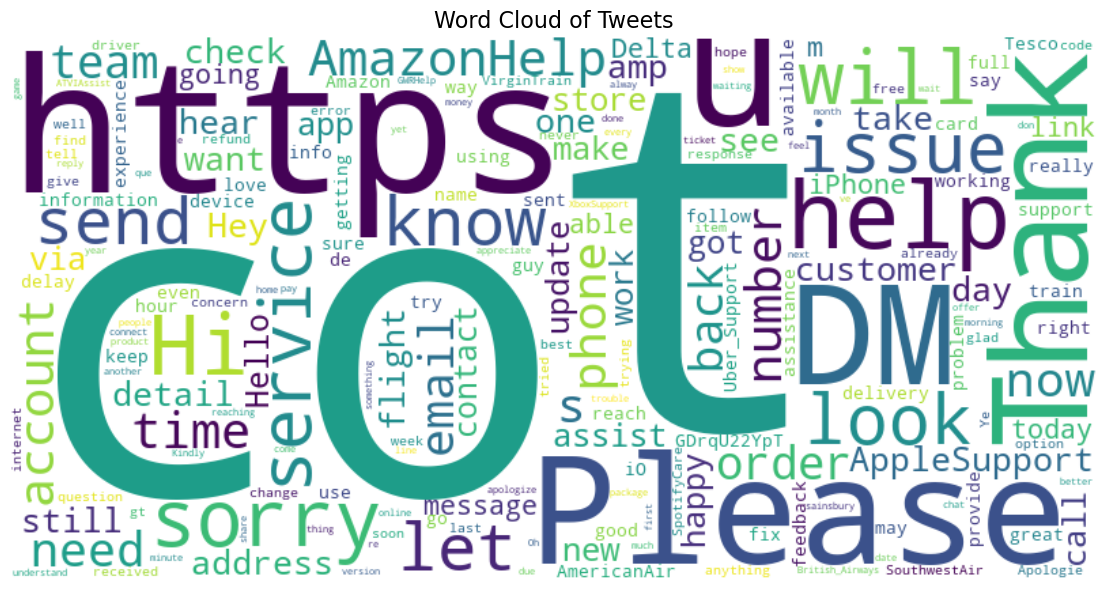

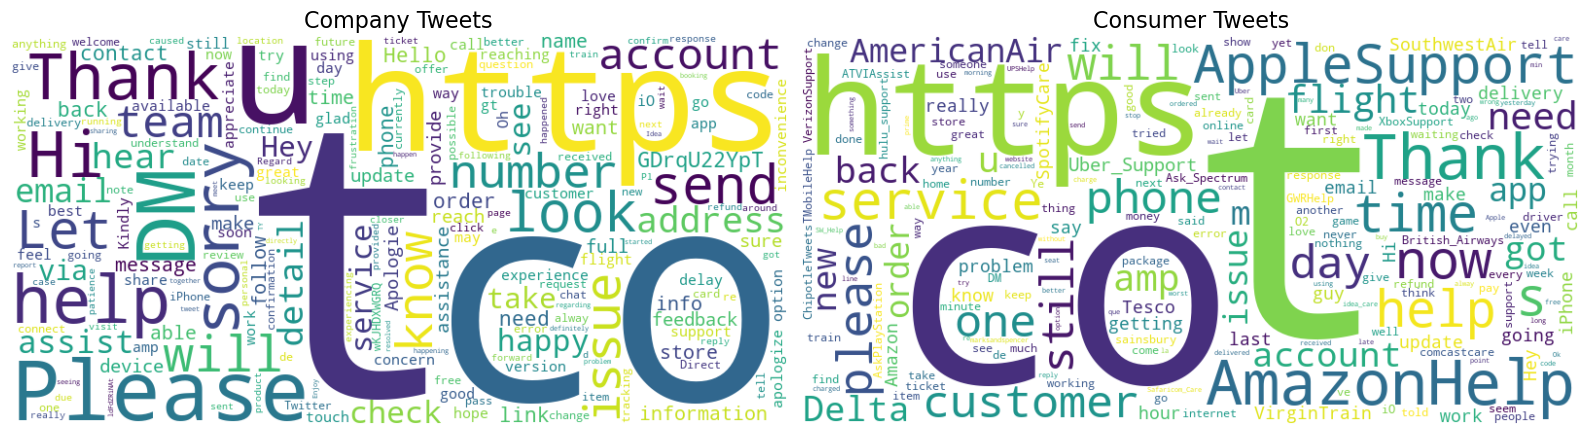

In [ ]:
# Install wordcloud if not already installed
import sys
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Join all tweet texts together
texts = " ".join(df.get_column('text').drop_nulls().to_list())

# Create a wordcloud
wordcloud = WordCloud(width=800, height=400, 
                     background_color='white',
                     max_words=200,
                     collocations=False).generate(texts)

# Display the wordcloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Tweets", fontsize=16)
plt.tight_layout()
plt.show()

# Create separate wordclouds for company tweets vs consumer tweets
# Company tweets
company_texts = " ".join(df.filter(~pl.col('inbound'))
                         .get_column('text')
                         .drop_nulls()
                         .to_list())

company_wordcloud = WordCloud(width=800, height=400,
                             background_color='white',
                             max_words=200,
                             collocations=False).generate(company_texts)

# Consumer tweets
consumer_texts = " ".join(df.filter(pl.col('inbound'))
                          .get_column('text')
                          .drop_nulls()
                          .to_list())

consumer_wordcloud = WordCloud(width=800, height=400,
                              background_color='white',
                              max_words=200,
                              collocations=False).generate(consumer_texts)

# Plot both wordclouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(company_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Company Tweets", fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(consumer_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Consumer Tweets", fontsize=16)

plt.tight_layout()
plt.show()